In [1]:
# Imports
import torch
from torch.utils.data import DataLoader
from Utilities.DTCR import DTCRConfig
from Utilities.ADTCR import ADTCRModel
from Utilities.UCRParser import read_dataset

In [2]:
testing_dataset = "SonyAIBORobotSurface"
train_ds, test_ds = read_dataset(testing_dataset)

config = DTCRConfig()
config.checkpoint_path = "ADTCR_Checkpoints"
config.class_num = train_ds.number_of_labels
config.input_size = train_ds[0][0].shape[1]
config.num_steps = train_ds[0][0].shape[0]
config.model_name = testing_dataset
config.batch_size = len(train_ds)

config.learning_rate = 5e-3
config.checkpoint_interval = 50
config.hidden_size = [50, 30, 30]
config.dilations = [1, 4, 16]
config.coefficient_lambda = 0.1

train_dl = DataLoader(train_ds, batch_size=config.batch_size, shuffle=True, drop_last=True)
test_dl = DataLoader(test_ds, batch_size=len(test_ds), shuffle=True)

Loading the SonyAIBORobotSurface dataset...
The dataset SonyAIBORobotSurface was loaded.


In [3]:
dtcr_model = ADTCRModel(config)
dtcr_model

ADTCRModel(
  (encoder): AttentionEncoder(
    (input_embedding): Linear(in_features=1, out_features=220, bias=True)
    (positional_embedding): Embedding(70, 220)
    (layers): ModuleList(
      (0): AttentionEncoderLayer(
        (mha): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=220, out_features=220, bias=True)
        )
        (first_norm): LayerNorm((220,), eps=1e-05, elementwise_affine=True)
        (ff): Sequential(
          (0): Linear(in_features=220, out_features=1024, bias=True)
          (1): ReLU()
          (2): Linear(in_features=1024, out_features=220, bias=True)
        )
        (second_norm): LayerNorm((220,), eps=1e-05, elementwise_affine=True)
      )
      (1): AttentionEncoderLayer(
        (mha): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=220, out_features=220, bias=True)
        )
        (first_norm): LayerNorm((220,), eps=1e-05, elementwise_affine=True)
        (ff): Seque

In [4]:
# if you want to continue the training load the model here from the checkpoint
# dtcr_model = torch.load("Checkpoints/ECGFiveDays_900")
recons_criterion = config.decoding_criterion()
classify_criterion = config.classifier_criterion()
optimizer = config.optimizer(dtcr_model.parameters(),
                             eps=config.learning_rate)

Starting epoch 1:
[1|1] loss: 311.1750, classify: 0.69493,recons: 1.03883, clustering: 3094.41260
Starting epoch 2:
[2|1] loss: 254.4611, classify: 0.69307,recons: 1.01083, clustering: 2527.57153
Starting epoch 3:
[3|1] loss: 89.1110, classify: 0.69574,recons: 0.98612, clustering: 874.29083
Starting epoch 4:
[4|1] loss: 33.5586, classify: 0.69337,recons: 0.98132, clustering: 318.83908
Starting epoch 5:
[5|1] loss: 15.7724, classify: 0.69318,recons: 0.98068, clustering: 140.98575
Starting epoch 6:
[6|1] loss: 11.7218, classify: 0.69326,recons: 0.97972, clustering: 100.48865
Starting epoch 7:
[7|1] loss: 11.0736, classify: 0.69315,recons: 0.97834, clustering: 94.02132
Starting epoch 8:
[8|1] loss: 11.8197, classify: 0.69310,recons: 0.97531, clustering: 101.51284
Starting epoch 9:
[9|1] loss: 11.0384, classify: 0.69341,recons: 0.97356, clustering: 93.71441
Starting epoch 10:
[10|1] loss: 8.7834, classify: 0.69317,recons: 0.97356, clustering: 71.16704
Starting epoch 11:
[11|1] loss: 5.5415

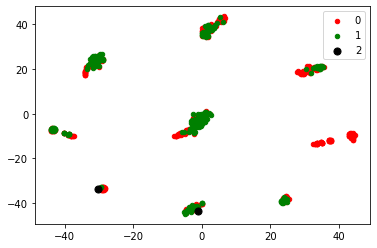

Plot with predicted labels (for kmeans and tsne sanity):


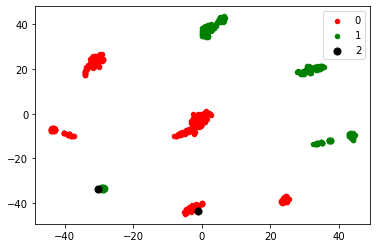

Starting epoch 51:
[51|1] loss: 3.0021, classify: 0.69312,recons: 0.59971, clustering: 17.09277
Starting epoch 52:
[52|1] loss: 3.1483, classify: 0.69317,recons: 0.58117, clustering: 18.73926
Starting epoch 53:
[53|1] loss: 2.7488, classify: 0.69315,recons: 0.58109, clustering: 14.74585
Starting epoch 54:
[54|1] loss: 2.6658, classify: 0.69319,recons: 0.58195, clustering: 13.90662
Starting epoch 55:
[55|1] loss: 2.7344, classify: 0.69319,recons: 0.58078, clustering: 14.60400
Starting epoch 56:
[56|1] loss: 2.6661, classify: 0.69320,recons: 0.57733, clustering: 13.95599
Starting epoch 57:
[57|1] loss: 2.4339, classify: 0.69321,recons: 0.56839, clustering: 11.72253
Starting epoch 58:
[58|1] loss: 2.7125, classify: 0.69320,recons: 0.56643, clustering: 14.52832
Starting epoch 59:
[59|1] loss: 2.5836, classify: 0.69317,recons: 0.56740, clustering: 13.22986
Starting epoch 60:
[60|1] loss: 2.6960, classify: 0.69313,recons: 0.56596, clustering: 14.36890
Starting epoch 61:
[61|1] loss: 2.6931, 

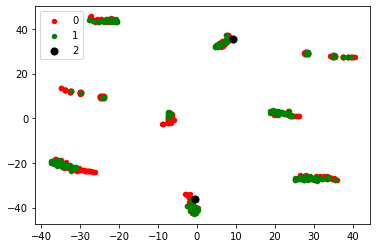

Plot with predicted labels (for kmeans and tsne sanity):


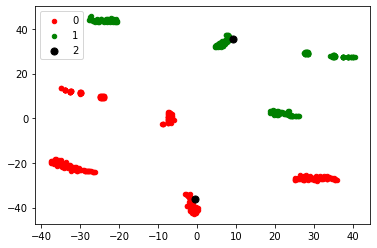

Starting epoch 101:
[101|1] loss: 1.9008, classify: 0.69315,recons: 0.34121, clustering: 8.66443
Starting epoch 102:
[102|1] loss: 1.8974, classify: 0.69315,recons: 0.33937, clustering: 8.64856
Starting epoch 103:
[103|1] loss: 1.8871, classify: 0.69315,recons: 0.33846, clustering: 8.55518
Starting epoch 104:
[104|1] loss: 1.8755, classify: 0.69315,recons: 0.33756, clustering: 8.44775
Starting epoch 105:
[105|1] loss: 1.8721, classify: 0.69315,recons: 0.33633, clustering: 8.42651
Starting epoch 106:
[106|1] loss: 1.8506, classify: 0.69315,recons: 0.33561, clustering: 8.21863
Starting epoch 107:
[107|1] loss: 1.8538, classify: 0.69315,recons: 0.33431, clustering: 8.26392
Starting epoch 108:
[108|1] loss: 1.8410, classify: 0.69313,recons: 0.33298, clustering: 8.14893
Starting epoch 109:
[109|1] loss: 1.7393, classify: 0.69315,recons: 0.33093, clustering: 7.15210
Starting epoch 110:
[110|1] loss: 1.7932, classify: 0.69313,recons: 0.32975, clustering: 7.70349
Starting epoch 111:
[111|1] lo

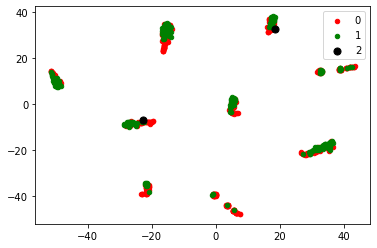

Plot with predicted labels (for kmeans and tsne sanity):


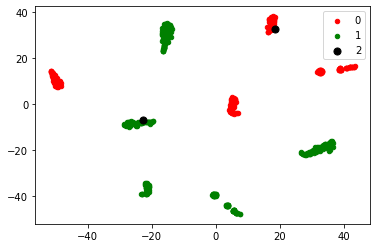

Starting epoch 151:
[151|1] loss: 1.2431, classify: 0.69317,recons: 0.29723, clustering: 2.52710
Starting epoch 152:
[152|1] loss: 1.2270, classify: 0.69313,recons: 0.29645, clustering: 2.37402
Starting epoch 153:
[153|1] loss: 1.1917, classify: 0.69313,recons: 0.29565, clustering: 2.02954
Starting epoch 154:
[154|1] loss: 1.2011, classify: 0.69315,recons: 0.29517, clustering: 2.12793
Starting epoch 155:
[155|1] loss: 1.1893, classify: 0.69315,recons: 0.29486, clustering: 2.01245
Starting epoch 156:
[156|1] loss: 1.1636, classify: 0.69315,recons: 0.29439, clustering: 1.76099
Starting epoch 157:
[157|1] loss: 1.1617, classify: 0.69317,recons: 0.29374, clustering: 1.74829
Starting epoch 158:
[158|1] loss: 1.1376, classify: 0.69319,recons: 0.29307, clustering: 1.51367
Starting epoch 159:
[159|1] loss: 1.1387, classify: 0.69315,recons: 0.29256, clustering: 1.52979
Starting epoch 160:
[160|1] loss: 1.1278, classify: 0.69315,recons: 0.29219, clustering: 1.42456
Starting epoch 161:
[161|1] lo

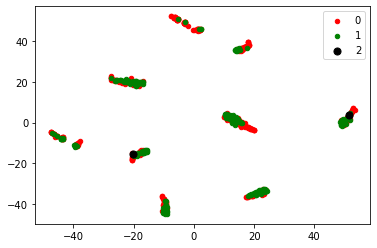

Plot with predicted labels (for kmeans and tsne sanity):


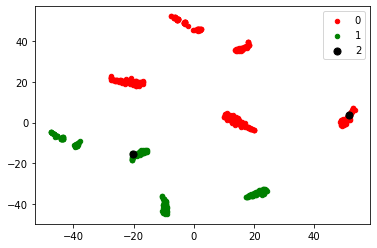

Starting epoch 201:
[201|1] loss: 0.9755, classify: 0.69315,recons: 0.27879, clustering: 0.03516
Starting epoch 202:
[202|1] loss: 0.9753, classify: 0.69315,recons: 0.27860, clustering: 0.03564
Starting epoch 203:
[203|1] loss: 0.9746, classify: 0.69315,recons: 0.27841, clustering: 0.03027
Starting epoch 204:
[204|1] loss: 0.9745, classify: 0.69315,recons: 0.27822, clustering: 0.03125
Starting epoch 205:
[205|1] loss: 0.9741, classify: 0.69315,recons: 0.27804, clustering: 0.02881
Starting epoch 206:
[206|1] loss: 0.9727, classify: 0.69315,recons: 0.27787, clustering: 0.01709
Starting epoch 207:
[207|1] loss: 0.9732, classify: 0.69315,recons: 0.27769, clustering: 0.02344
Starting epoch 208:
[208|1] loss: 0.9731, classify: 0.69315,recons: 0.27752, clustering: 0.02393
Starting epoch 209:
[209|1] loss: 0.9727, classify: 0.69315,recons: 0.27736, clustering: 0.02246
Starting epoch 210:
[210|1] loss: 0.9723, classify: 0.69315,recons: 0.27719, clustering: 0.02002
Starting epoch 211:
[211|1] lo

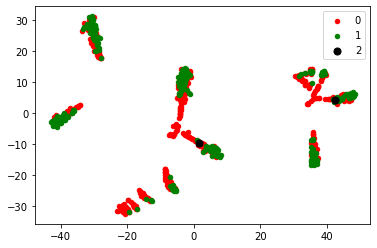

Plot with predicted labels (for kmeans and tsne sanity):


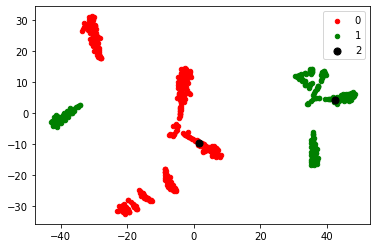

Starting epoch 251:
[251|1] loss: 0.9669, classify: 0.69315,recons: 0.27369, clustering: 0.00098
Starting epoch 252:
[252|1] loss: 0.9665, classify: 0.69315,recons: 0.27329, clustering: 0.00098
Starting epoch 253:
[253|1] loss: 0.9659, classify: 0.69315,recons: 0.27262, clustering: 0.00146
Starting epoch 254:
[254|1] loss: 0.9654, classify: 0.69315,recons: 0.27209, clustering: 0.00146
Starting epoch 255:
[255|1] loss: 0.9652, classify: 0.69315,recons: 0.27200, clustering: 0.00049
Starting epoch 256:
[256|1] loss: 0.9655, classify: 0.69315,recons: 0.27223, clustering: 0.00098
Starting epoch 257:
[257|1] loss: 0.9657, classify: 0.69315,recons: 0.27244, clustering: 0.00146
Starting epoch 258:
[258|1] loss: 0.9657, classify: 0.69315,recons: 0.27241, clustering: 0.00098
Starting epoch 259:
[259|1] loss: 0.9653, classify: 0.69315,recons: 0.27209, clustering: 0.00098
Starting epoch 260:
[260|1] loss: 0.9650, classify: 0.69315,recons: 0.27172, clustering: 0.00098
Starting epoch 261:
[261|1] lo

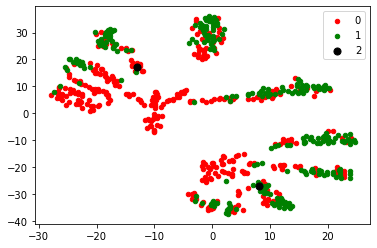

Plot with predicted labels (for kmeans and tsne sanity):


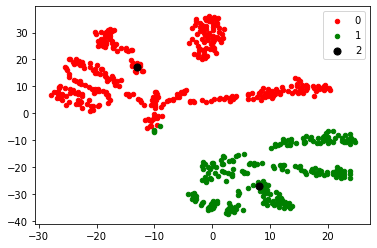

Starting epoch 301:
[301|1] loss: 0.9625, classify: 0.69315,recons: 0.26933, clustering: 0.00049
Starting epoch 302:
[302|1] loss: 0.9626, classify: 0.69315,recons: 0.26934, clustering: 0.00098
Starting epoch 303:
[303|1] loss: 0.9626, classify: 0.69315,recons: 0.26935, clustering: 0.00049
Starting epoch 304:
[304|1] loss: 0.9626, classify: 0.69315,recons: 0.26940, clustering: 0.00098
Starting epoch 305:
[305|1] loss: 0.9627, classify: 0.69315,recons: 0.26948, clustering: 0.00049
Starting epoch 306:
[306|1] loss: 0.9628, classify: 0.69315,recons: 0.26963, clustering: 0.00049
Starting epoch 307:
[307|1] loss: 0.9630, classify: 0.69315,recons: 0.26986, clustering: 0.00000
Starting epoch 308:
[308|1] loss: 0.9634, classify: 0.69315,recons: 0.27024, clustering: 0.00049
Starting epoch 309:
[309|1] loss: 0.9640, classify: 0.69315,recons: 0.27076, clustering: 0.00098
Starting epoch 310:
[310|1] loss: 0.9648, classify: 0.69315,recons: 0.27160, clustering: 0.00000
Starting epoch 311:
[311|1] lo

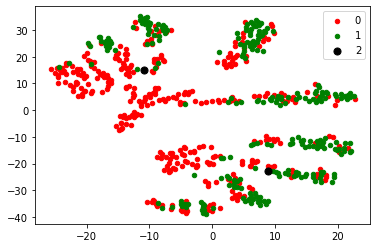

Plot with predicted labels (for kmeans and tsne sanity):


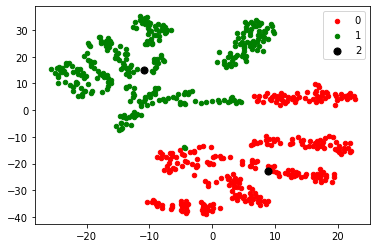

Starting epoch 351:
[351|1] loss: 0.9612, classify: 0.69315,recons: 0.26802, clustering: 0.00049
Starting epoch 352:
[352|1] loss: 0.9611, classify: 0.69315,recons: 0.26799, clustering: 0.00000
Starting epoch 353:
[353|1] loss: 0.9612, classify: 0.69315,recons: 0.26799, clustering: 0.00049
Starting epoch 354:
[354|1] loss: 0.9612, classify: 0.69315,recons: 0.26802, clustering: 0.00049
Starting epoch 355:
[355|1] loss: 0.9612, classify: 0.69315,recons: 0.26803, clustering: 0.00049
Starting epoch 356:
[356|1] loss: 0.9612, classify: 0.69315,recons: 0.26803, clustering: 0.00049
Starting epoch 357:
[357|1] loss: 0.9612, classify: 0.69315,recons: 0.26800, clustering: 0.00098
Starting epoch 358:
[358|1] loss: 0.9612, classify: 0.69315,recons: 0.26796, clustering: 0.00049
Starting epoch 359:
[359|1] loss: 0.9611, classify: 0.69315,recons: 0.26792, clustering: 0.00049
Starting epoch 360:
[360|1] loss: 0.9610, classify: 0.69315,recons: 0.26788, clustering: 0.00000
Starting epoch 361:
[361|1] lo

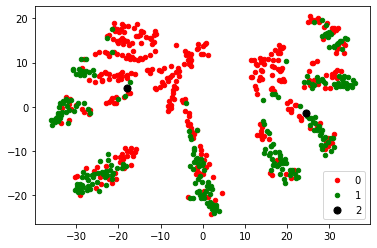

Plot with predicted labels (for kmeans and tsne sanity):


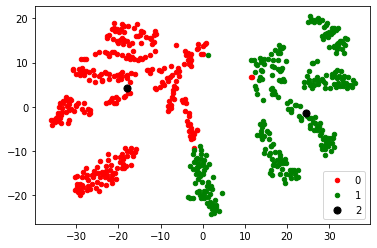

Starting epoch 401:
[401|1] loss: 0.9606, classify: 0.69315,recons: 0.26740, clustering: 0.00049
Starting epoch 402:
[402|1] loss: 0.9606, classify: 0.69315,recons: 0.26739, clustering: 0.00098
Starting epoch 403:
[403|1] loss: 0.9606, classify: 0.69315,recons: 0.26738, clustering: 0.00049
Starting epoch 404:
[404|1] loss: 0.9606, classify: 0.69315,recons: 0.26737, clustering: 0.00049
Starting epoch 405:
[405|1] loss: 0.9606, classify: 0.69315,recons: 0.26737, clustering: 0.00049
Starting epoch 406:
[406|1] loss: 0.9606, classify: 0.69315,recons: 0.26736, clustering: 0.00049
Starting epoch 407:
[407|1] loss: 0.9606, classify: 0.69315,recons: 0.26735, clustering: 0.00049
Starting epoch 408:
[408|1] loss: 0.9605, classify: 0.69315,recons: 0.26735, clustering: 0.00049
Starting epoch 409:
[409|1] loss: 0.9605, classify: 0.69315,recons: 0.26735, clustering: 0.00049
Starting epoch 410:
[410|1] loss: 0.9605, classify: 0.69315,recons: 0.26734, clustering: 0.00049
Starting epoch 411:
[411|1] lo

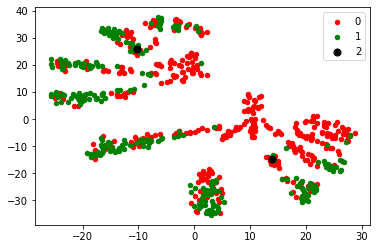

Plot with predicted labels (for kmeans and tsne sanity):


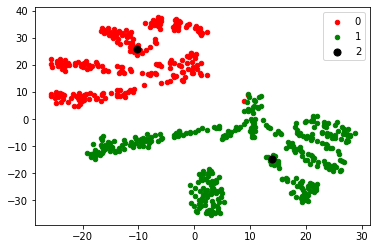

Starting epoch 451:
[451|1] loss: 0.9603, classify: 0.69315,recons: 0.26712, clustering: 0.00000
Starting epoch 452:
[452|1] loss: 0.9602, classify: 0.69315,recons: 0.26701, clustering: 0.00000
Starting epoch 453:
[453|1] loss: 0.9601, classify: 0.69315,recons: 0.26697, clustering: 0.00000
Starting epoch 454:
[454|1] loss: 0.9602, classify: 0.69315,recons: 0.26698, clustering: 0.00049
Starting epoch 455:
[455|1] loss: 0.9602, classify: 0.69315,recons: 0.26703, clustering: 0.00049
Starting epoch 456:
[456|1] loss: 0.9603, classify: 0.69315,recons: 0.26709, clustering: 0.00049
Starting epoch 457:
[457|1] loss: 0.9603, classify: 0.69315,recons: 0.26712, clustering: 0.00049
Starting epoch 458:
[458|1] loss: 0.9603, classify: 0.69315,recons: 0.26710, clustering: 0.00098
Starting epoch 459:
[459|1] loss: 0.9602, classify: 0.69315,recons: 0.26706, clustering: 0.00000
Starting epoch 460:
[460|1] loss: 0.9602, classify: 0.69315,recons: 0.26700, clustering: 0.00049
Starting epoch 461:
[461|1] lo

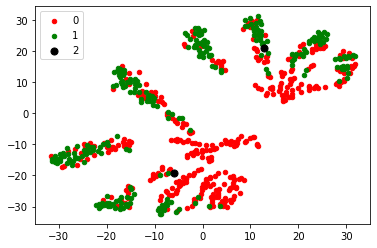

Plot with predicted labels (for kmeans and tsne sanity):


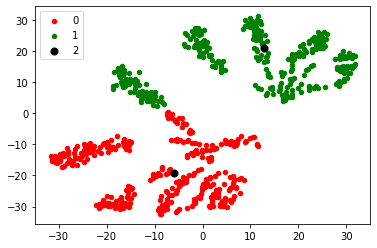

Starting epoch 501:
[501|1] loss: 0.9599, classify: 0.69315,recons: 0.26667, clustering: 0.00049
Starting epoch 502:
[502|1] loss: 0.9599, classify: 0.69315,recons: 0.26666, clustering: 0.00049
Starting epoch 503:
[503|1] loss: 0.9599, classify: 0.69315,recons: 0.26666, clustering: 0.00049
Starting epoch 504:
[504|1] loss: 0.9599, classify: 0.69315,recons: 0.26665, clustering: 0.00049
Starting epoch 505:
[505|1] loss: 0.9598, classify: 0.69315,recons: 0.26665, clustering: 0.00000
Starting epoch 506:
[506|1] loss: 0.9598, classify: 0.69315,recons: 0.26664, clustering: 0.00049
Starting epoch 507:
[507|1] loss: 0.9598, classify: 0.69315,recons: 0.26663, clustering: 0.00049
Starting epoch 508:
[508|1] loss: 0.9598, classify: 0.69315,recons: 0.26663, clustering: 0.00000
Starting epoch 509:
[509|1] loss: 0.9599, classify: 0.69315,recons: 0.26662, clustering: 0.00098
Starting epoch 510:
[510|1] loss: 0.9598, classify: 0.69315,recons: 0.26662, clustering: 0.00049
Starting epoch 511:
[511|1] lo

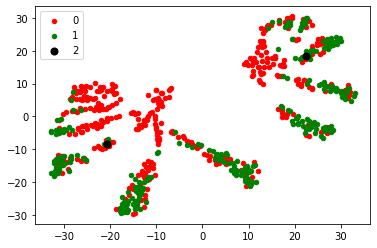

Plot with predicted labels (for kmeans and tsne sanity):


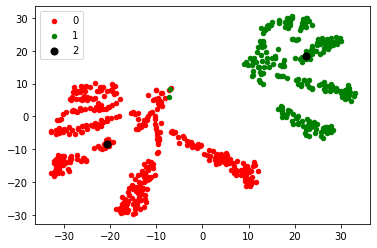

Starting epoch 551:
[551|1] loss: 0.9596, classify: 0.69315,recons: 0.26643, clustering: 0.00000
Starting epoch 552:
[552|1] loss: 0.9596, classify: 0.69315,recons: 0.26643, clustering: 0.00049
Starting epoch 553:
[553|1] loss: 0.9596, classify: 0.69315,recons: 0.26644, clustering: 0.00000
Starting epoch 554:
[554|1] loss: 0.9596, classify: 0.69315,recons: 0.26644, clustering: 0.00049
Starting epoch 555:
[555|1] loss: 0.9596, classify: 0.69315,recons: 0.26645, clustering: 0.00000
Starting epoch 556:
[556|1] loss: 0.9596, classify: 0.69315,recons: 0.26646, clustering: 0.00000
Starting epoch 557:
[557|1] loss: 0.9597, classify: 0.69315,recons: 0.26648, clustering: 0.00049
Starting epoch 558:
[558|1] loss: 0.9597, classify: 0.69315,recons: 0.26651, clustering: 0.00049
Starting epoch 559:
[559|1] loss: 0.9597, classify: 0.69315,recons: 0.26655, clustering: 0.00000
Starting epoch 560:
[560|1] loss: 0.9598, classify: 0.69315,recons: 0.26662, clustering: 0.00000
Starting epoch 561:
[561|1] lo

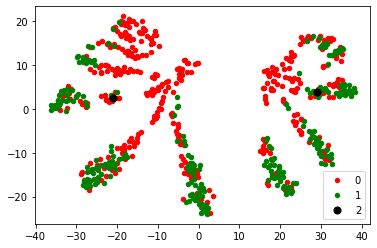

Plot with predicted labels (for kmeans and tsne sanity):


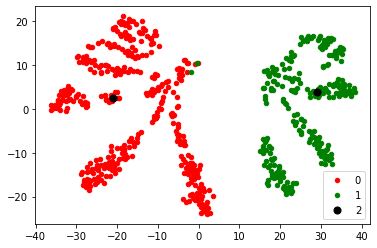

Starting epoch 601:
[601|1] loss: 0.9595, classify: 0.69315,recons: 0.26638, clustering: 0.00000
Starting epoch 602:
[602|1] loss: 0.9596, classify: 0.69315,recons: 0.26640, clustering: 0.00049
Starting epoch 603:
[603|1] loss: 0.9596, classify: 0.69315,recons: 0.26638, clustering: 0.00049
Starting epoch 604:
[604|1] loss: 0.9595, classify: 0.69315,recons: 0.26635, clustering: 0.00049
Starting epoch 605:
[605|1] loss: 0.9595, classify: 0.69315,recons: 0.26630, clustering: 0.00049
Starting epoch 606:
[606|1] loss: 0.9595, classify: 0.69315,recons: 0.26626, clustering: 0.00049
Starting epoch 607:
[607|1] loss: 0.9594, classify: 0.69315,recons: 0.26623, clustering: 0.00000
Starting epoch 608:
[608|1] loss: 0.9594, classify: 0.69315,recons: 0.26622, clustering: 0.00000
Starting epoch 609:
[609|1] loss: 0.9594, classify: 0.69315,recons: 0.26622, clustering: 0.00049
Starting epoch 610:
[610|1] loss: 0.9594, classify: 0.69315,recons: 0.26623, clustering: 0.00049
Starting epoch 611:
[611|1] lo

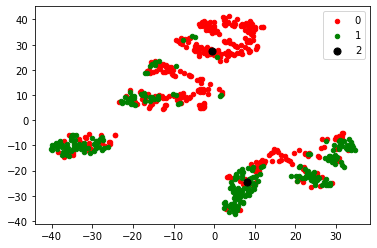

Plot with predicted labels (for kmeans and tsne sanity):


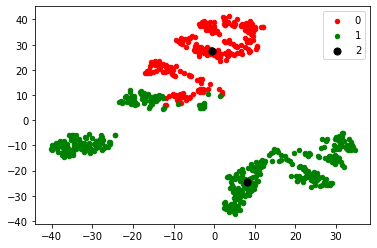

Starting epoch 651:
[651|1] loss: 0.9594, classify: 0.69315,recons: 0.26613, clustering: 0.00098
Starting epoch 652:
[652|1] loss: 0.9593, classify: 0.69315,recons: 0.26610, clustering: 0.00049
Starting epoch 653:
[653|1] loss: 0.9592, classify: 0.69315,recons: 0.26608, clustering: 0.00000
Starting epoch 654:
[654|1] loss: 0.9593, classify: 0.69315,recons: 0.26606, clustering: 0.00049
Starting epoch 655:
[655|1] loss: 0.9592, classify: 0.69315,recons: 0.26605, clustering: 0.00049
Starting epoch 656:
[656|1] loss: 0.9592, classify: 0.69315,recons: 0.26605, clustering: 0.00049
Starting epoch 657:
[657|1] loss: 0.9592, classify: 0.69315,recons: 0.26605, clustering: 0.00000
Starting epoch 658:
[658|1] loss: 0.9593, classify: 0.69315,recons: 0.26606, clustering: 0.00049
Starting epoch 659:
[659|1] loss: 0.9593, classify: 0.69315,recons: 0.26606, clustering: 0.00098
Starting epoch 660:
[660|1] loss: 0.9592, classify: 0.69315,recons: 0.26607, clustering: 0.00000
Starting epoch 661:
[661|1] lo

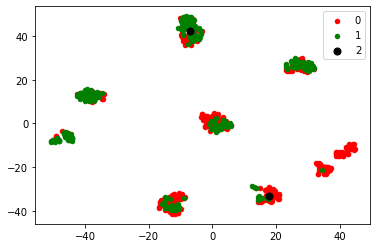

Plot with predicted labels (for kmeans and tsne sanity):


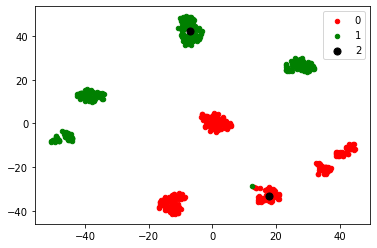

Starting epoch 701:
[701|1] loss: 0.9620, classify: 0.69315,recons: 0.26881, clustering: 0.00049
Starting epoch 702:
[702|1] loss: 0.9614, classify: 0.69315,recons: 0.26822, clustering: 0.00049
Starting epoch 703:
[703|1] loss: 0.9609, classify: 0.69315,recons: 0.26764, clustering: 0.00098
Starting epoch 704:
[704|1] loss: 0.9601, classify: 0.69315,recons: 0.26694, clustering: 0.00049
Starting epoch 705:
[705|1] loss: 0.9596, classify: 0.69315,recons: 0.26640, clustering: 0.00049
Starting epoch 706:
[706|1] loss: 0.9593, classify: 0.69315,recons: 0.26602, clustering: 0.00098
Starting epoch 707:
[707|1] loss: 0.9591, classify: 0.69315,recons: 0.26586, clustering: 0.00049
Starting epoch 708:
[708|1] loss: 0.9591, classify: 0.69315,recons: 0.26588, clustering: 0.00098
Starting epoch 709:
[709|1] loss: 0.9592, classify: 0.69315,recons: 0.26603, clustering: 0.00049
Starting epoch 710:
[710|1] loss: 0.9594, classify: 0.69315,recons: 0.26625, clustering: 0.00049
Starting epoch 711:
[711|1] lo

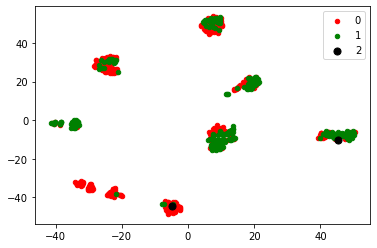

Plot with predicted labels (for kmeans and tsne sanity):


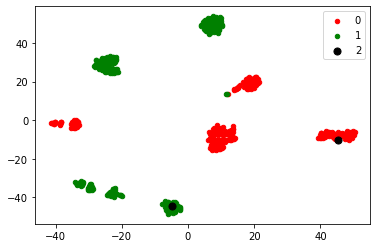

Starting epoch 751:
[751|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00098
Starting epoch 752:
[752|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00146
Starting epoch 753:
[753|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00146
Starting epoch 754:
[754|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00098
Starting epoch 755:
[755|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00098
Starting epoch 756:
[756|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00098
Starting epoch 757:
[757|1] loss: 0.9590, classify: 0.69315,recons: 0.26574, clustering: 0.00146
Starting epoch 758:
[758|1] loss: 0.9590, classify: 0.69315,recons: 0.26573, clustering: 0.00146
Starting epoch 759:
[759|1] loss: 0.9590, classify: 0.69315,recons: 0.26573, clustering: 0.00146
Starting epoch 760:
[760|1] loss: 0.9589, classify: 0.69315,recons: 0.26573, clustering: 0.00049
Starting epoch 761:
[761|1] lo

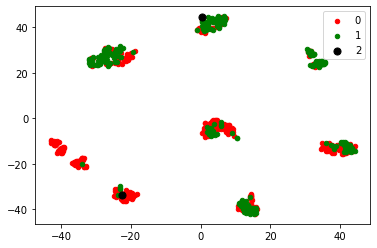

Plot with predicted labels (for kmeans and tsne sanity):


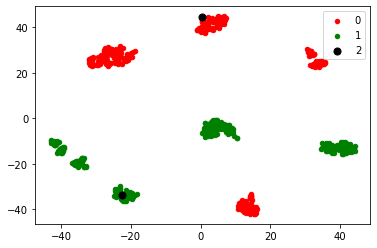

Starting epoch 801:
[801|1] loss: 0.9612, classify: 0.69315,recons: 0.26791, clustering: 0.00146
Starting epoch 802:
[802|1] loss: 0.9617, classify: 0.69315,recons: 0.26835, clustering: 0.00195
Starting epoch 803:
[803|1] loss: 0.9622, classify: 0.69315,recons: 0.26896, clustering: 0.00146
Starting epoch 804:
[804|1] loss: 0.9624, classify: 0.69315,recons: 0.26921, clustering: 0.00049
Starting epoch 805:
[805|1] loss: 0.9628, classify: 0.69315,recons: 0.26952, clustering: 0.00146
Starting epoch 806:
[806|1] loss: 0.9625, classify: 0.69315,recons: 0.26921, clustering: 0.00098
Starting epoch 807:
[807|1] loss: 0.9621, classify: 0.69315,recons: 0.26884, clustering: 0.00146
Starting epoch 808:
[808|1] loss: 0.9612, classify: 0.69315,recons: 0.26799, clustering: 0.00049
Starting epoch 809:
[809|1] loss: 0.9604, classify: 0.69315,recons: 0.26720, clustering: 0.00049
Starting epoch 810:
[810|1] loss: 0.9597, classify: 0.69315,recons: 0.26642, clustering: 0.00146
Starting epoch 811:
[811|1] lo

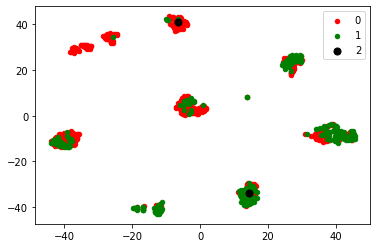

Plot with predicted labels (for kmeans and tsne sanity):


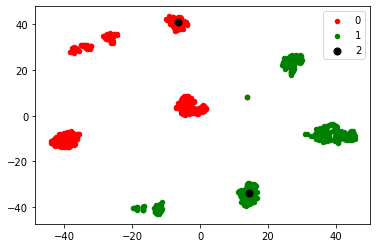

Starting epoch 851:
[851|1] loss: 0.9589, classify: 0.69315,recons: 0.26562, clustering: 0.00098
Starting epoch 852:
[852|1] loss: 0.9589, classify: 0.69315,recons: 0.26562, clustering: 0.00146
Starting epoch 853:
[853|1] loss: 0.9589, classify: 0.69315,recons: 0.26562, clustering: 0.00098
Starting epoch 854:
[854|1] loss: 0.9588, classify: 0.69315,recons: 0.26562, clustering: 0.00049
Starting epoch 855:
[855|1] loss: 0.9589, classify: 0.69315,recons: 0.26562, clustering: 0.00098
Starting epoch 856:
[856|1] loss: 0.9589, classify: 0.69315,recons: 0.26561, clustering: 0.00098
Starting epoch 857:
[857|1] loss: 0.9588, classify: 0.69315,recons: 0.26560, clustering: 0.00098
Starting epoch 858:
[858|1] loss: 0.9589, classify: 0.69315,recons: 0.26560, clustering: 0.00146
Starting epoch 859:
[859|1] loss: 0.9588, classify: 0.69315,recons: 0.26559, clustering: 0.00098
Starting epoch 860:
[860|1] loss: 0.9588, classify: 0.69315,recons: 0.26559, clustering: 0.00098
Starting epoch 861:
[861|1] lo

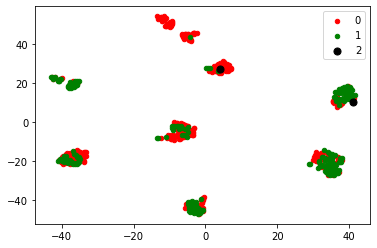

Plot with predicted labels (for kmeans and tsne sanity):


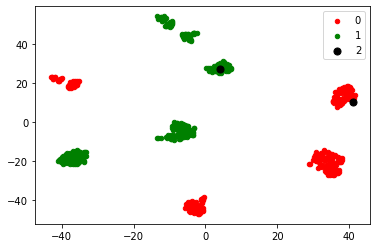

Starting epoch 901:
[901|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00098
Starting epoch 902:
[902|1] loss: 0.9587, classify: 0.69315,recons: 0.26554, clustering: 0.00049
Starting epoch 903:
[903|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00146
Starting epoch 904:
[904|1] loss: 0.9589, classify: 0.69315,recons: 0.26554, clustering: 0.00195
Starting epoch 905:
[905|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00146
Starting epoch 906:
[906|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00098
Starting epoch 907:
[907|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00146
Starting epoch 908:
[908|1] loss: 0.9588, classify: 0.69315,recons: 0.26554, clustering: 0.00146
Starting epoch 909:
[909|1] loss: 0.9588, classify: 0.69315,recons: 0.26555, clustering: 0.00146
Starting epoch 910:
[910|1] loss: 0.9588, classify: 0.69315,recons: 0.26555, clustering: 0.00146
Starting epoch 911:
[911|1] lo

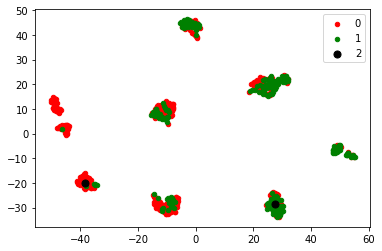

Plot with predicted labels (for kmeans and tsne sanity):


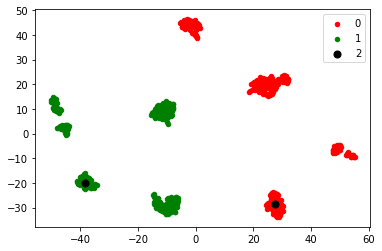

Starting epoch 951:
[951|1] loss: 0.9590, classify: 0.69315,recons: 0.26572, clustering: 0.00098
Starting epoch 952:
[952|1] loss: 0.9589, classify: 0.69315,recons: 0.26557, clustering: 0.00146
Starting epoch 953:
[953|1] loss: 0.9588, classify: 0.69315,recons: 0.26550, clustering: 0.00146
Starting epoch 954:
[954|1] loss: 0.9587, classify: 0.69315,recons: 0.26552, clustering: 0.00049
Starting epoch 955:
[955|1] loss: 0.9588, classify: 0.69315,recons: 0.26560, clustering: 0.00098
Starting epoch 956:
[956|1] loss: 0.9589, classify: 0.69315,recons: 0.26568, clustering: 0.00098
Starting epoch 957:
[957|1] loss: 0.9591, classify: 0.69315,recons: 0.26573, clustering: 0.00195
Starting epoch 958:
[958|1] loss: 0.9590, classify: 0.69315,recons: 0.26572, clustering: 0.00098
Starting epoch 959:
[959|1] loss: 0.9590, classify: 0.69315,recons: 0.26567, clustering: 0.00146
Starting epoch 960:
[960|1] loss: 0.9588, classify: 0.69315,recons: 0.26559, clustering: 0.00098
Starting epoch 961:
[961|1] lo

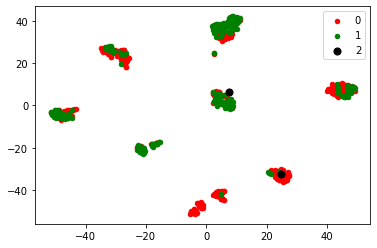

Plot with predicted labels (for kmeans and tsne sanity):


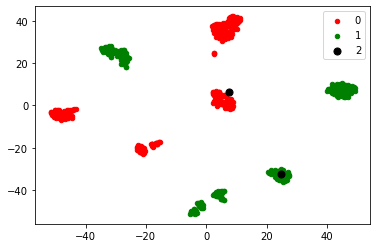

In [5]:
epochs = 1000
for epoch in range(dtcr_model._training_iteration, epochs):
    print("Starting epoch {}:".format(epoch + 1))
    dtcr_model.train_step(train_dl, test_dl, recons_criterion, classify_criterion,
                          optimizer)